* Criado por: Gabriel Quintella
* Data Criação: 24.01.2023
* Data Última Modificação: 05.02.2023
* Repositório: https://github.com/dbaassists/Projeto-KB-Spark/blob/main/Projeto%20KB%20Spark.ipynb

DESCRIÇÃO DO PROJETO

Criar uma base de conhecimento (KB) com comandos pyspark.

*  Dia 01 - 24.01.2023 - Lançamento do Projeto;
*  Dia 02 - 26.01.2023 - Aprimoramento do Projeto com melhoria nos exemplos criados;
*  Dia 03 - 27.01.2023 - Aprimoramento do Projeto com melhoria nos exemplos criados;
*  Dia 04 - 28.01.2023 - Aprimoramento do Projeto com melhoria nos exemplos criados;
*  Dia 05 - 29.01.2023 - Aprimoramento do Projeto com melhoria nos exemplos criados;
*  Dia 06 - 30.01.2023 - Aprimoramento do Projeto com melhoria nos exemplos criados;
*  Dia 07 - 31.01.2023 - Aprimoramento do Projeto com melhoria nos exemplos criados;
*  Dia 08 - 01.02.2023 - Reorganização dos tópicos e inclusões de novos exemplos;
*  Dia 09 - 02.02.2023 - Exemplos de criação de arquivos;
*  Dia 10 - 03.02.2023 - Inclusão de Novos Exemplos;
*  Dia 11 - 05.02.2023 - Inclusão de Novos Exemplos;


 Sumário

* 01 - Instalação da Biblioteca PySpark
* 02 - Definição de Bibliotecas
* 02.1 - Arquivos Usados
* 03 - Métodos de Importação de Arquivos CSV
* 03.1 - Importando Arquivo CSV de forma FULL
* 03.2 - Importando Arquivo CSV Definindo o Delimitador de Colunas
* 03.2.1 - Comando Semelhante ao DataFrame.info() do Pandas
* 03.2.2 - Consultando a Estrutura do DataFrame Spark
* 03.2.3 - Formas de Aplicar o Método DataFrame.show()
* 03.3 - Importando Arquivo CSV Definindo Delimitador de Colunas e Cabeçalho
* 03.4 - Importando TODOS os Arquivos CSV de um Diretório
* 03.5 - Importando Arquivo CSV Definindo inferSchema
* 03.6 - Importando Arquivo CSV Definindo encoding
* 03.7 - Definindo a Estrutura de um DataFrame e Importar CSV
* 04 - Trabalhando com Datas - Converte coluna String (DD/MM/AAA) para Date (AAAAMMDD)
* 04.1 - Trabalhando com Datas - A partir de uma coluna de Data, criar outra de Ano
* 04.2 - Trabalhando com Datas - A partir de uma coluna de Data, criar outra de Mês
* 04.3 - Trabalhando com Datas - A partir de uma coluna de Data, criar outra de Dia
* 05 - Manipulando informações de um DataFrame
* 05.1 - Tratando Valores Nulos
* 05.2 - Filtrando Valores
* 05.2.1 - Semelhante a cláusula LIKE - "CONTÉM" de Bancos de Dados
* 05.2.2 - Semelhante a cláusula LIKE - "INICIA COM" de Bancos de Dados
* 05.2.3 - Semelhante a cláusula LIKE - "TERMINA COM" de Bancos de Dados
* 05.2.4 - Semelhante a cláusula WHERE de Bancos de Dados
* 05.2.5 - Semelhante a cláusula IN de Bancos de Dados
* 05.3 - Tratando Valores com UPPER, LOWER e INITCAPT
* 06 - Transformando o DataFrame Spark em Tabela Temporária
* 06.1 - Lendo a Tabela e Transformando em outro DataFrame Spark
* 07 - Convertendo DataType de um DataFrame Spark
* 07.1 - De uma Coluna
* 07.2 - Criando uma nova Coluna
* 08 - Renomeando Coluna(s) em DataFrame Spark
* 08.1 - Uma Única Coluna
* 08.2 - Várias Colunas
* 09 - Ordenando um DataFrame Spark
* 09.1 - Ordenando um DataFrame Spark por uma Coluna
* 09.2 - Ordenando um DataFrame Spark por Várias Colunas
* 10 - Agrupando um DataFrame Spark
* 11 - Funções de Agrupamento (Count(), Sum(), Min(), Max() e Mean())
* 12 - Lendo/Gerando Arquivos a Parquet
* 12.1 - Gerando Arquivos a Parquet
* 12.2 - Lendo Arquivos a Parquet
* 13 - Gerando Arquivos a CSV

# 01 - Instalação da Biblioteca PySpark

In [1]:
#pip install pyspark

# 02 - Definição de Bibliotecas

In [1]:
import sys
import requests
import pandas as pd
import json
import pyspark.sql.functions as F #import explode_outer, col
from pyspark.sql.types import *
import os
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark import SparkConf
from pyspark import SparkContext
import urllib
from sqlalchemy import __version__ as sa_version, create_engine, text


# 02.1 - Arquivos Usados

In [2]:
arquivoDadosEleitorais = '../ProjetoSparkKB/Dados/Candidato/consulta_cand_2022_BRASIL.csv'

arquivoIndicadorHomicidio = '../ProjetoSparkKB/Dados/IndicadorSegurancaPublica/indicador_homocidio.csv'

arquivoIndicadorHomicidio2 = '../ProjetoSparkKB/Dados/IndicadorSegurancaPublica/indicador_homocidio_2.csv'

arquivoIndicadorHomicidioRes = '../ProjetoSparkKB/Dados/IndicadorSegurancaPublica/indicador_homocidio_res.csv'

In [4]:
spark = SparkSession.builder.getOrCreate()

In [5]:
spark.conf.set("spark.sql.repl.eagerEval.enabled", "true")

# 03 - Métodos de Importação de Arquivos CSV

* A CSV dataset is pointed to by path.
* The path can be either a single CSV file or a directory of CSV files
* path = "examples/src/main/resources/people.csv"

df = spark.read.csv(path)

df.show()

** Documentação: https://spark.apache.org/docs/latest/sql-data-sources-csv.html

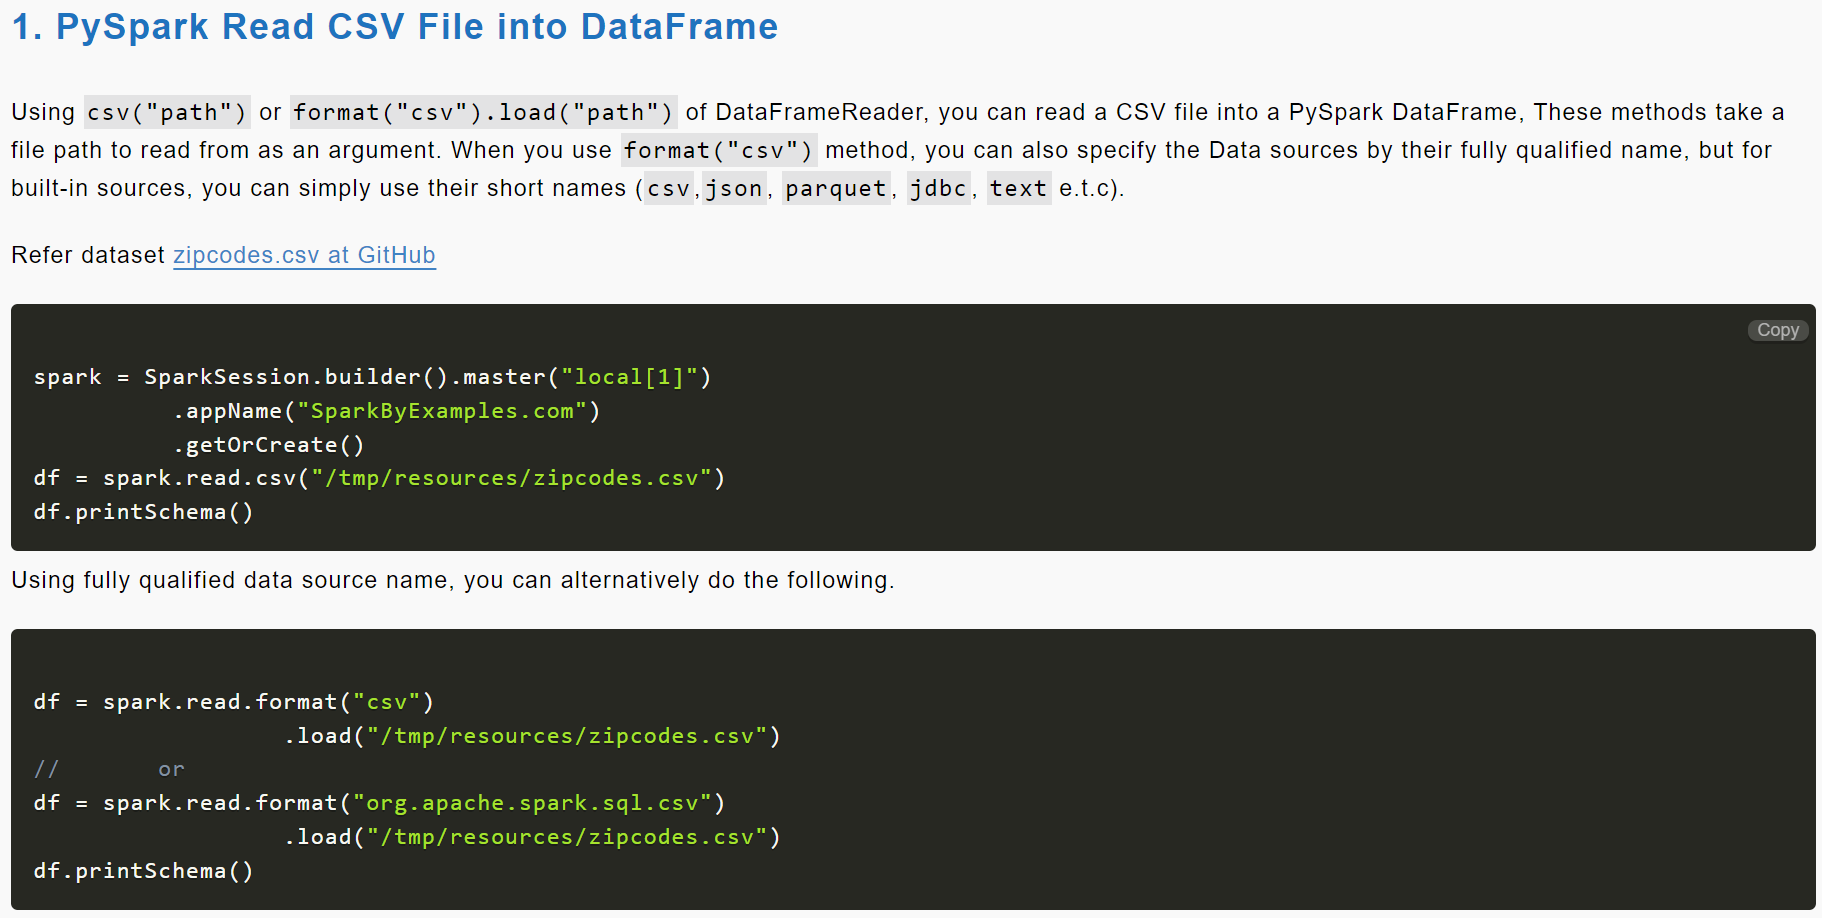

** Documentação: https://sparkbyexamples.com/pyspark/pyspark-read-csv-file-into-dataframe/

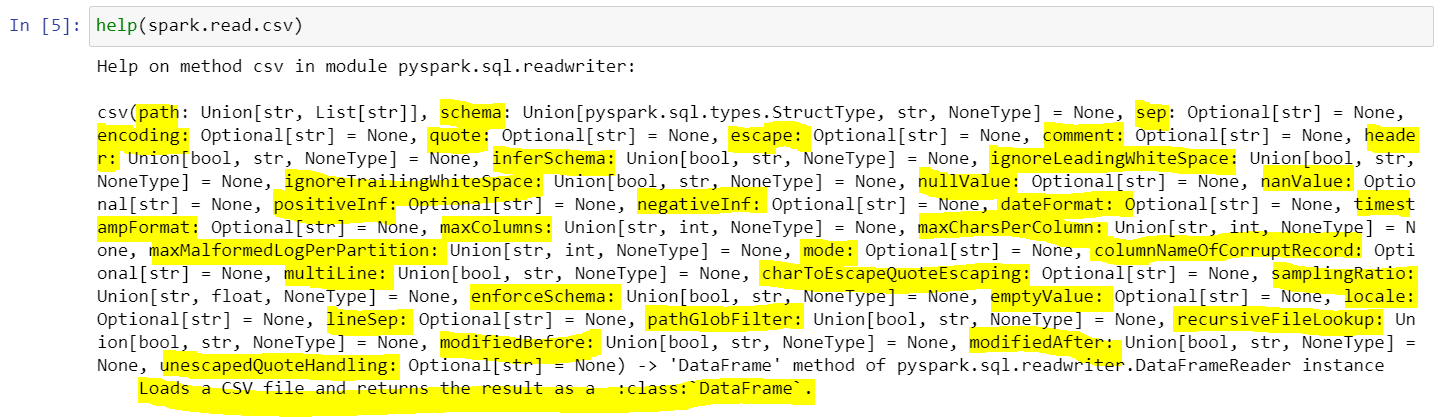

In [5]:
help(spark.read.csv)

Help on method csv in module pyspark.sql.readwriter:

csv(path: Union[str, List[str]], schema: Union[pyspark.sql.types.StructType, str, NoneType] = None, sep: Optional[str] = None, encoding: Optional[str] = None, quote: Optional[str] = None, escape: Optional[str] = None, comment: Optional[str] = None, header: Union[bool, str, NoneType] = None, inferSchema: Union[bool, str, NoneType] = None, ignoreLeadingWhiteSpace: Union[bool, str, NoneType] = None, ignoreTrailingWhiteSpace: Union[bool, str, NoneType] = None, nullValue: Optional[str] = None, nanValue: Optional[str] = None, positiveInf: Optional[str] = None, negativeInf: Optional[str] = None, dateFormat: Optional[str] = None, timestampFormat: Optional[str] = None, maxColumns: Union[str, int, NoneType] = None, maxCharsPerColumn: Union[str, int, NoneType] = None, maxMalformedLogPerPartition: Union[str, int, NoneType] = None, mode: Optional[str] = None, columnNameOfCorruptRecord: Optional[str] = None, multiLine: Union[bool, str, NoneType] 

# 03.1 - Importando Arquivo CSV de forma FULL

* Nos próximos passos vamos abordar os seguintes conceitos da "spark.read.csv()"


### Path: 
* * É o diretório que o arquivo encotra-se armazenado;


### Sep: 
* * É o separador que se utiliza para que as colunas sejam separadas dentro do arquivo de dados;


### Header:
* * É o boleano que utiliza a primeira linha para a nomeação das colunas do arquivo;


### InferSchema:
* * Presume o datatype baseando-se nas colunas que estão nele;

In [6]:

df = spark.read.csv(arquivoDadosEleitorais)


* Podemos realizar um "dir(DataFrame)" para poder listar todos os métodos disponíveis

In [7]:
dir(df)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_collect_as_arrow',
 '_jcols',
 '_jdf',
 '_jmap',
 '_joinAsOf',
 '_jseq',
 '_lazy_rdd',
 '_repr_html_',
 '_sc',
 '_schema',
 '_session',
 '_sort_cols',
 '_sql_ctx',
 '_support_repr_html',
 '_to_corrected_pandas_type',
 'agg',
 'alias',
 'approxQuantile',
 'cache',
 'checkpoint',
 'coalesce',
 'colRegex',
 'collect',
 'columns',
 'corr',
 'count',
 'cov',
 'createGlobalTempView',
 'createOrReplaceGlobalTempView',
 'createOrReplaceTempView',
 'createTempView',
 'crossJoin',
 'crosstab',
 'cube',
 'describe',
 'distinct',
 'drop',
 'dropDuplicates',
 'drop_duplicates',
 'dropna',
 'dtypes',
 

# 03.2 - Importando Arquivo CSV Definindo o Delimitador de Colunas

* Read a csv with delimiter, the default delimiter is ","

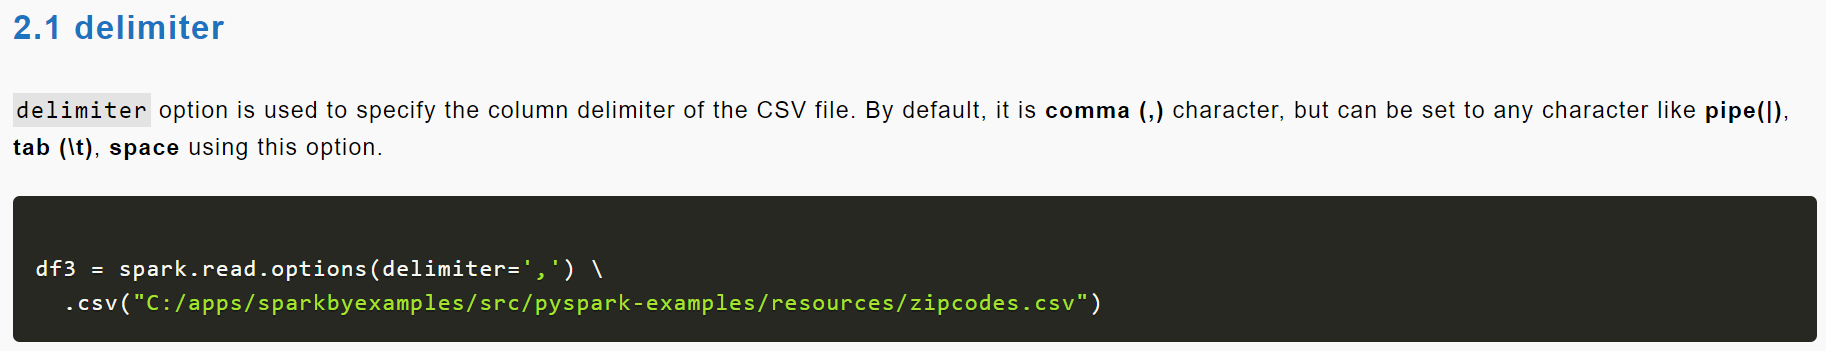

In [7]:

df = spark.read.option('delimiter',';').csv(arquivoDadosEleitorais)


## 03.2.1 - Comando Semelhante ao DataFrame.info() do Pandas

# 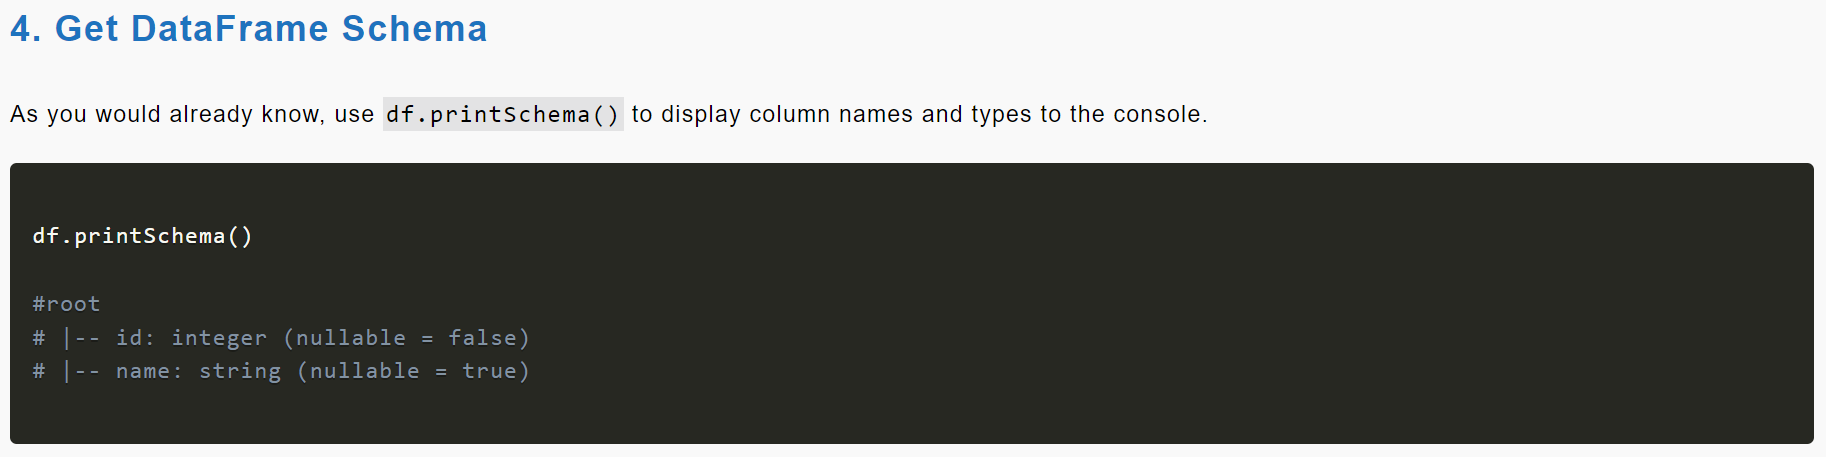

In [8]:
df.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: string (nullable = true)
 |-- _c4: string (nullable = true)
 |-- _c5: string (nullable = true)
 |-- _c6: string (nullable = true)
 |-- _c7: string (nullable = true)
 |-- _c8: string (nullable = true)
 |-- _c9: string (nullable = true)
 |-- _c10: string (nullable = true)
 |-- _c11: string (nullable = true)
 |-- _c12: string (nullable = true)
 |-- _c13: string (nullable = true)
 |-- _c14: string (nullable = true)
 |-- _c15: string (nullable = true)
 |-- _c16: string (nullable = true)
 |-- _c17: string (nullable = true)
 |-- _c18: string (nullable = true)
 |-- _c19: string (nullable = true)
 |-- _c20: string (nullable = true)
 |-- _c21: string (nullable = true)
 |-- _c22: string (nullable = true)
 |-- _c23: string (nullable = true)
 |-- _c24: string (nullable = true)
 |-- _c25: string (nullable = true)
 |-- _c26: string (nullable = true)
 |-- _c27: string (nullable = tru

## 03.2.2 - Consultando a Estrutura do DataFrame Spark

In [9]:
df.summary()

summary,_c0,_c1,_c2,_c3,_c4,_c5,_c6,_c7,_c8,_c9,_c10,_c11,_c12,_c13,_c14,_c15,_c16,_c17,_c18,_c19,_c20,_c21,_c22,_c23,_c24,_c25,_c26,_c27,_c28,_c29,_c30,_c31,_c32,_c33,_c34,_c35,_c36,_c37,_c38,_c39,_c40,_c41,_c42,_c43,_c44,_c45,_c46,_c47,_c48,_c49,_c50,_c51,_c52,_c53,_c54,_c55,_c56,_c57,_c58,_c59,_c60,_c61,_c62,_c63,_c64,_c65,_c66,_c67,_c68,_c69,_c70
count,29315,29315,29315,29315,29315,29315,29315,29315,29315,29315,29315,29315,29315,29315,29315,29315,29315,29315,29315,29315,29315,29315,29315,29315,29315,29315,29315,29315,29315,29315,29315,29315,29315,29315,29315,29315,29315,29315,29315,29315,29315,29315,29290,29290,29315,29315,29315,29315,29315,29315,29315,29315,29315,29315,29315,29315,29315,29315,29315,29315,29315,29315,29315,29315,29315,29315,29315,29315,29315,29315,29315
mean,null,null,2022.0,2.0,null,1.001773896431739,545.9997270928567,null,null,null,null,null,null,6.621853039503309,null,1.520102352983276...,21369.20833049055,null,null,null,3.593280116028829E10,null,11.138500375247322,null,2.8570989970662484,null,null,33.95091082759091,null,null,-0.5352732482772736,null,null,null,1.520102790807002...,null,null,0.9989424848195402,null,null,-3.0,null,null,48.69732664140121,6.8154998498669E10,2.6705328511973803,null,6.950842600805076,null,3.212287644129085,null,1.9173773623524595,null,419.17080575834075,null,2062307.921849772,4.111891928771236,null,null,null,-1.0,6.012829357969214...,2.123558709149212,null,2.1439585181142116,null,null,null,2.2286279593368357,null,null
stddev,null,null,0.0,0.0,null,0.042080994897107316,0.07295064332436894,null,null,null,null,null,null,0.8024890691676738,null,7.340171573646939E10,22202.201761499375,null,null,null,3.091180967653085...,null,2.647933950692263,null,2.8709397081305092,null,null,21.43896899948043,null,null,1.127434840146433,null,null,null,7.340171673360342E10,null,null,0.1598458150150077,null,null,2.952749782513274...,null,null,11.345056995984976,7.781818533494855E10,0.9656185982812869,null,1.4227532942982066,null,2.479045563346378,null,1.0033527524592856,null,330.081132521777,null,2280128.230039526,1.4588008677707747,null,null,null,0.0,8.323999222021878E15,1.8581761371838326,null,2.0042129326828633,null,null,null,2.2137333331364215,null,null
min,21/01/2023,18:38:33,2022,2,ELEI��O ORDIN�RIA,1,544,DS_ELEICAO,02/10/2022,ESTADUAL,AC,AC,ACRE,1,1� SUPLENTE,100001599072,10,AAVA SANTIAGO AGUIAR,A VERA,#NULO#,-4,NM_EMAIL,12,APTO,13,CANCELADO,COLIGA��O,10,AGIR,AGIR,-1,#NULO#,#NULO#,#NULO#,100001680979,Avan�ar para faz...,#NULO#,-4,BRASILEIRA (NATUR...,AC,-3,ABADIA DOS DOURADOS,01/01/1941,18,-4,-4,DS_GENERO,-4,DS_GRAU_INSTRUCAO,-4,CASADO(A),-4,AMARELA,-4,ADMINISTRADOR,-1,-1,#NULO#,N,N,-1,06001610220226030000,-1,#NULO#,-1,#NULO#,N�O,#NULO#,-1,#NULO#,N
25%,null,null,2022.0,2.0,null,1.0,546.0,null,null,null,null,null,null,6.0,null,9.0001651581E10,3510.0,null,null,null,6.745374919E9,null,12.0,null,2.0,null,null,15.0,null,null,-1.0,null,null,null,9.0001683337E10,null,null,1.0,null,null,-3.0,null,null,41.0,1.6231670485E10,2.0,null,6.0,null,1.0,null,1.0,null,169.0,null,1270629.01,4.0,null,null,null,-1.0,6.006787120226150...,2.0,null,2.0,null,null,null,2.0,null,null
50%,null,null,2022.0,2.0,null,1.0,546.0,null,null,null,null,null,null,7.0,null,1.60001614519E11,13113.0,null,null,null,2.9168724349E10,null,12.0,null,2.0,null,null,28.0,null,null,-1.0,null,null,null,1.60001681736E11,null,null,1.0,null,null,-3.0,null,null,48.0,4.0168901759E10,2.0,null,8.0,null,3.0,null,2.0,null,265.0,null,1270629.01,5.0,null,null,null,-1.0,6.01018802022609E18,2.0,null,2.0,null,null,null,2.0,null,null
75%,null,null,2022.0,2.0,null,1.0,546.0,null,null,null,null,null,null,7.0,null,2.10001647987E11,35350.0,null,null,null,6.2267906287E10,null,12.0,null,2.0,null,null,45.0,null,null,-1.0,null,null,null,2.10001683229E11,null,null,1.0,null,null,-3.0,null,null,57.0,9.0463380221E10,4.0,null,8.0,null,3.0,null,3.0,null,601.0,null,3176572.53,5.0,null,null,null,-1.0,6.016593520226209...,2.0,null,2.0,null,null,null,2.0,null,null
max,DT_GER

# 03.2.3 - Formas de Aplicar o Método DataFrame.show()

In [9]:
help(df.show)

Help on method show in module pyspark.sql.dataframe:

show(n: int = 20, truncate: Union[bool, int] = True, vertical: bool = False) -> None method of pyspark.sql.dataframe.DataFrame instance
    Prints the first ``n`` rows to the console.
    
    .. versionadded:: 1.3.0
    
    Parameters
    ----------
    n : int, optional
        Number of rows to show.
    truncate : bool or int, optional
        If set to ``True``, truncate strings longer than 20 chars by default.
        If set to a number greater than one, truncates long strings to length ``truncate``
        and align cells right.
    vertical : bool, optional
        If set to ``True``, print output rows vertically (one line
        per column value).
    
    Examples
    --------
    >>> df
    DataFrame[age: int, name: string]
    >>> df.show()
    +---+-----+
    |age| name|
    +---+-----+
    |  2|Alice|
    |  5|  Bob|
    +---+-----+
    >>> df.show(truncate=3)
    +---+----+
    |age|name|
    +---+----+
    |  2| Al

### ATENÇÃO: 


* * A atribuição realizada abaixo não irá armazenar nenhum resultado no dataframe "dfexemplo" pois o método DataFrame.show() é um método de exibição de registros no console

* * Mesma observação para o método "DataFrame.printSchema()"

* * Eles sempre irão retornar "None" para o DataFrame que está recebendo a atribuição

In [11]:
dfexemplo = df.show()

type(dfexemplo)

dfexemplo

+--------------------+
|                 _c0|
+--------------------+
|"DT_GERACAO";"HH_...|
|"21/01/2023";"18:...|
|"21/01/2023";"18:...|
|"21/01/2023";"18:...|
|"21/01/2023";"18:...|
|"21/01/2023";"18:...|
|"21/01/2023";"18:...|
|"21/01/2023";"18:...|
|"21/01/2023";"18:...|
|"21/01/2023";"18:...|
|"21/01/2023";"18:...|
|"21/01/2023";"18:...|
|"21/01/2023";"18:...|
|"21/01/2023";"18:...|
|"21/01/2023";"18:...|
|"21/01/2023";"18:...|
|"21/01/2023";"18:...|
|"21/01/2023";"18:...|
|"21/01/2023";"18:...|
|"21/01/2023";"18:...|
+--------------------+
only showing top 20 rows



NoneType

In [10]:
# Show full contents of DataFrame (PySpark)
df.show(truncate=False)

# Show top 5 rows and full column contents (PySpark)
df.show(5,truncate=False) 

# Shows top 5 rows and only 10 characters of each column (PySpark)
df.show(5,truncate=10) 

# Shows rows vertically (one line per column value) (PySpark)
df.show(vertical=True)

+----------+----------+-----------+---------------+-----------------+--------+----------+------------------------------+----------+--------------+-----+-----+-----------------+--------+-----------------+------------+------------+-------------------------------------------+-----------------------------+-------------------+----------------+--------------+-----------------------+-----------------------+------------------------+------------------------+---------------+----------+-------------+----------------------------------------+------------+------------------------+--------------+-----------------------+------------+---------------+-----------------------+----------------+----------------+----------------+-----------------------+-----------------------+-------------+-------------------+-----------------------------+---------+---------+-----------------+-----------------------------+---------------+---------------+-----------+-----------+-----------+------------------------------------

+----------+----------+----------+----------+----------+--------+----------+----------+----------+----------+-----+-----+----------+--------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+---------+---------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+
|       _c0|       _c1|       _c2|       _c3|       _c4|     _c5|       _c6|       _c7|       _c8|       _c9| _c10| _c11|      _c12|    _c13|      _c14|      _c15|      _c16|      _c17|      _c18|      _c19|      _c20|      _c21|    

# 03.2.4 - Listando TODAS as colunas de um DataFrame

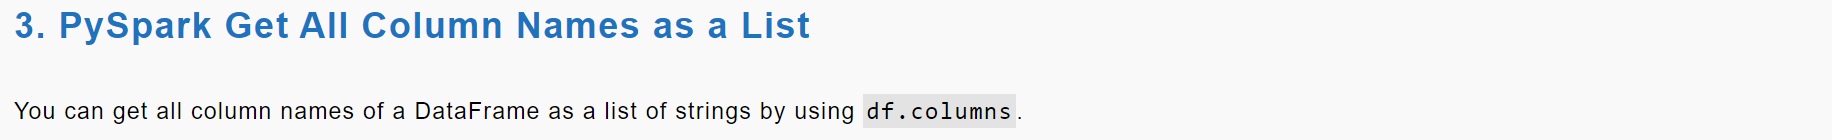
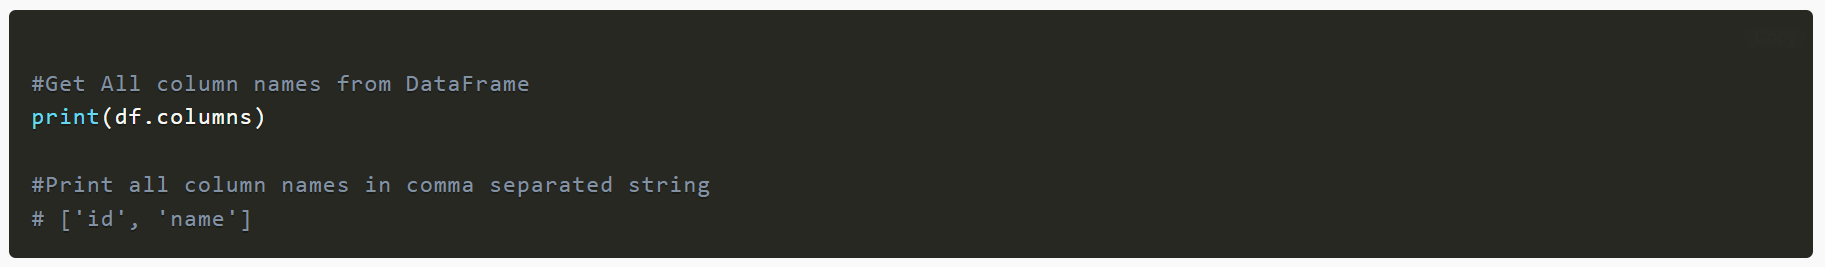

In [11]:
print(df.columns)

['_c0', '_c1', '_c2', '_c3', '_c4', '_c5', '_c6', '_c7', '_c8', '_c9', '_c10', '_c11', '_c12', '_c13', '_c14', '_c15', '_c16', '_c17', '_c18', '_c19', '_c20', '_c21', '_c22', '_c23', '_c24', '_c25', '_c26', '_c27', '_c28', '_c29', '_c30', '_c31', '_c32', '_c33', '_c34', '_c35', '_c36', '_c37', '_c38', '_c39', '_c40', '_c41', '_c42', '_c43', '_c44', '_c45', '_c46', '_c47', '_c48', '_c49', '_c50', '_c51', '_c52', '_c53', '_c54', '_c55', '_c56', '_c57', '_c58', '_c59', '_c60', '_c61', '_c62', '_c63', '_c64', '_c65', '_c66', '_c67', '_c68', '_c69', '_c70']


# 03.2.5 - Listando DataType de uma determinad coluna de um DataFrame

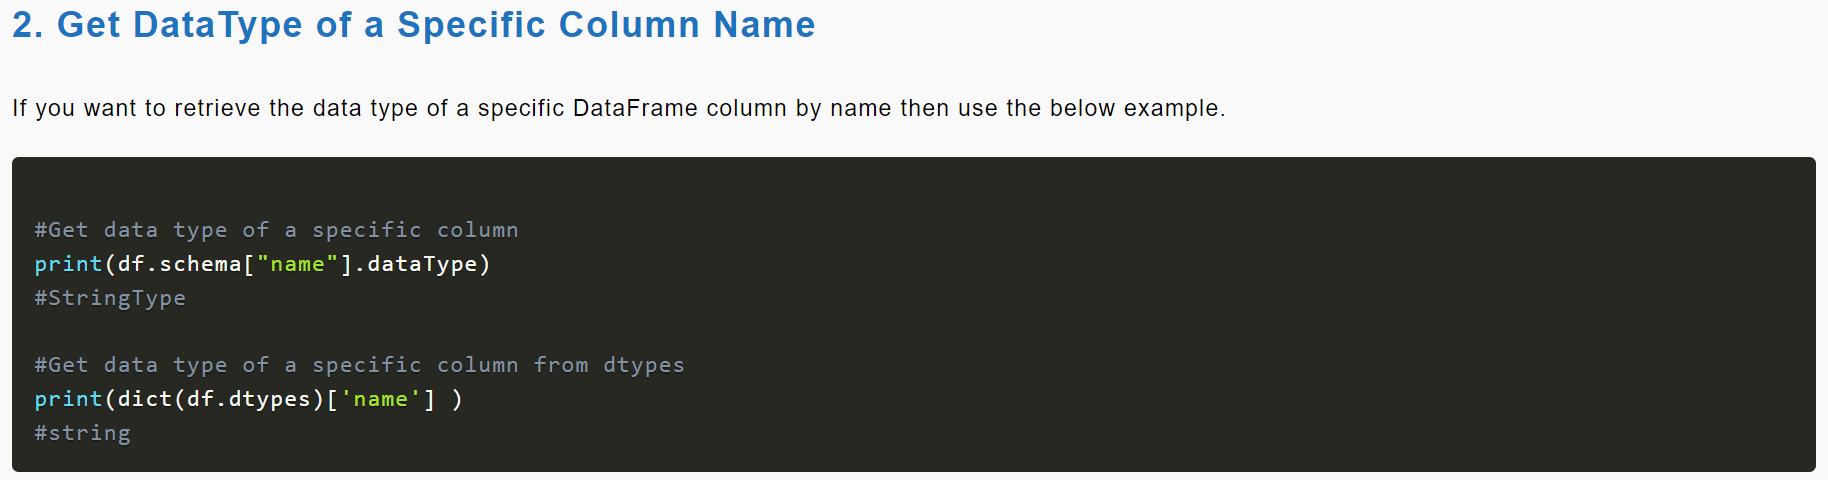

In [12]:
#Get data type of a specific column
print(df.schema["DT_GERACAO"].dataType)
#StringType

#Get data type of a specific column from dtypes
print(dict(df.dtypes)['DT_GERACAO'] )
#string

KeyError: 'No StructField named DT_GERACAO'

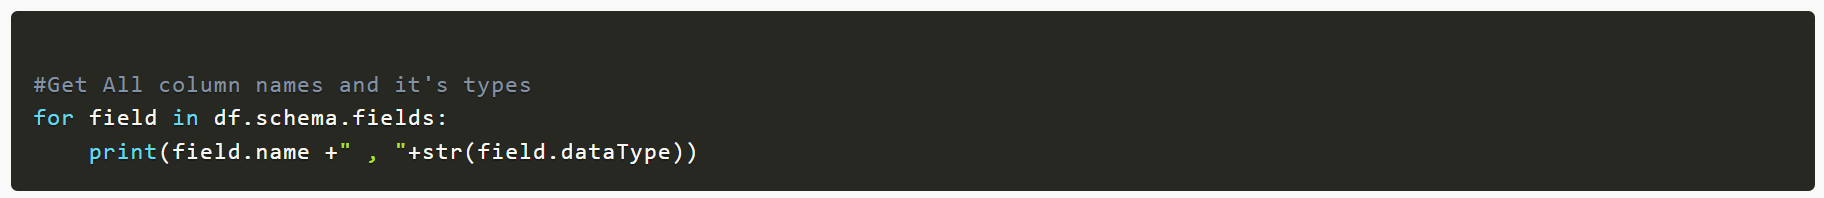

In [ ]:
#Get All column names and it's types
for field in df.schema.fields:
    print(field.name +" , "+str(field.dataType))

In [ ]:

df3 = df.select("SQ_CANDIDATO"
                ,"DS_CARGO"
                ,"NM_URNA_CANDIDATO"
                ,"DT_NASCIMENTO")

df3

In [ ]:

split_col = split(df['DT_NASCIMENTO'], '/')
df3 = df.select("SQ_CANDIDATO"
                ,"DS_CARGO"
                ,"NM_URNA_CANDIDATO"
                ,"DT_NASCIMENTO"
                ,split_col.getItem(0).alias('DIA')
                ,split_col.getItem(1).alias('MES')
                ,split_col.getItem(2).alias('ANO'))   
df3

# Entendendo a diferença entre as funções option() e options()

# 03.3 - Importando Arquivo CSV Definindo Delimitador de Colunas e Cabeçalho

## Usando Função: option()

* Read a csv with delimiter and a header

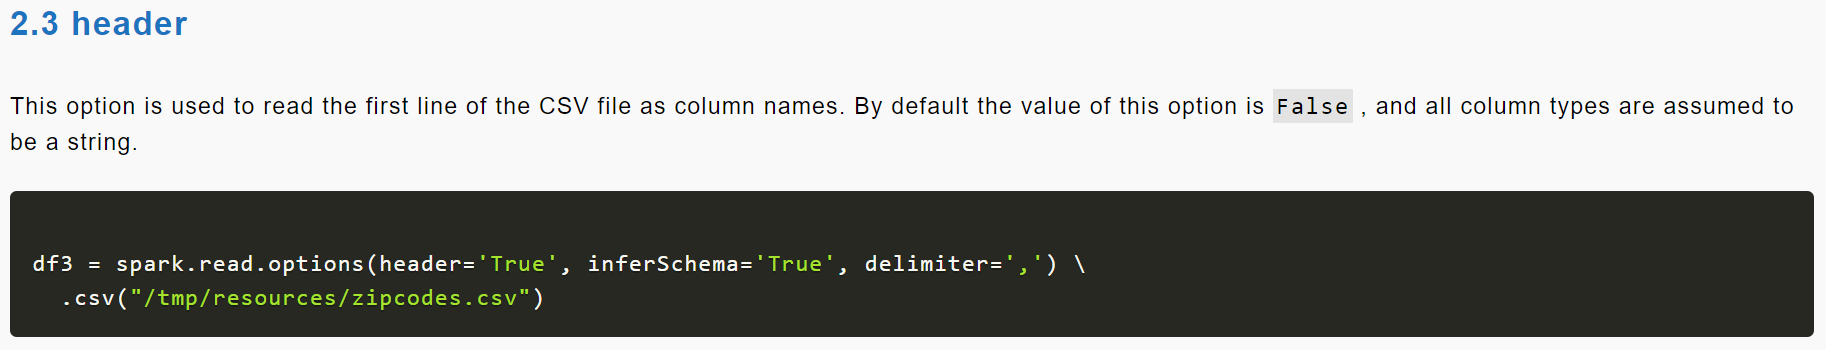

In [ ]:


df = spark.read.option('delimiter',';') \
                .option('header','True') \
                .csv(arquivoDadosEleitorais)

#df.select('DT_GERACAO').show()

df.show(2,truncate=False)

## Usando Função: options()

* You can also use options() to use multiple options

In [ ]:


df = spark.read.options(delimiter=';'
                        , header='True') \
                        .csv(arquivoDadosEleitorais)

#df.select('DT_GERACAO').show()

df.show(2,truncate=False)

# URGENTE ==> Pesquisar 

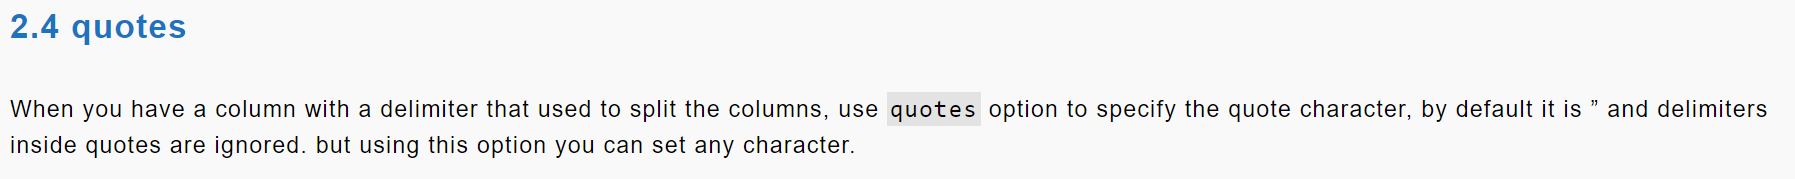

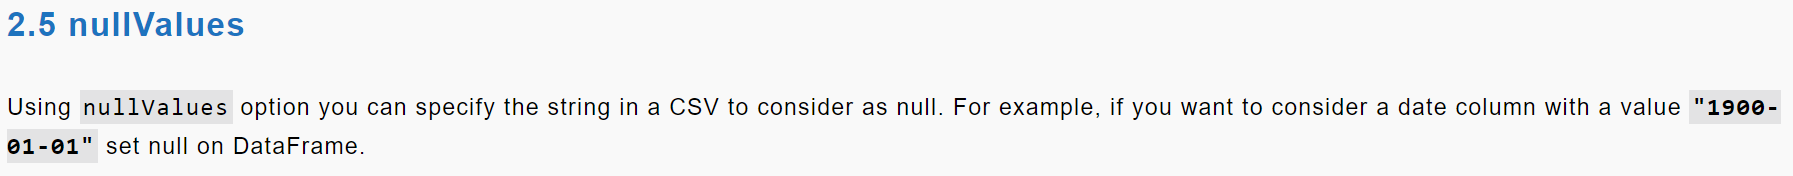

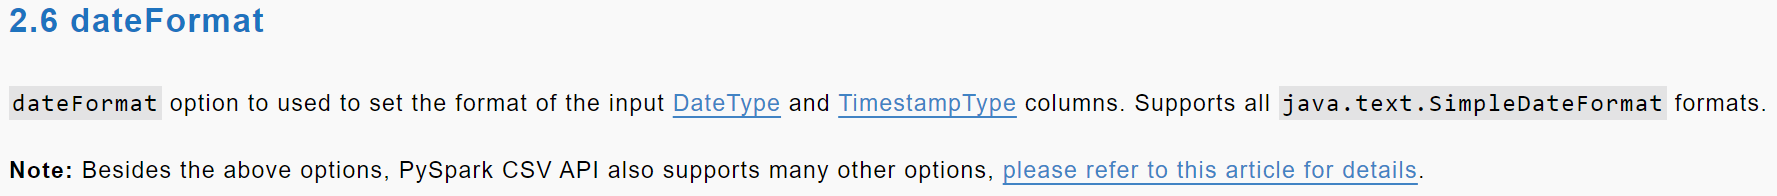 

# 03.4 - Importando TODOS os Arquivos CSV de um Diretório

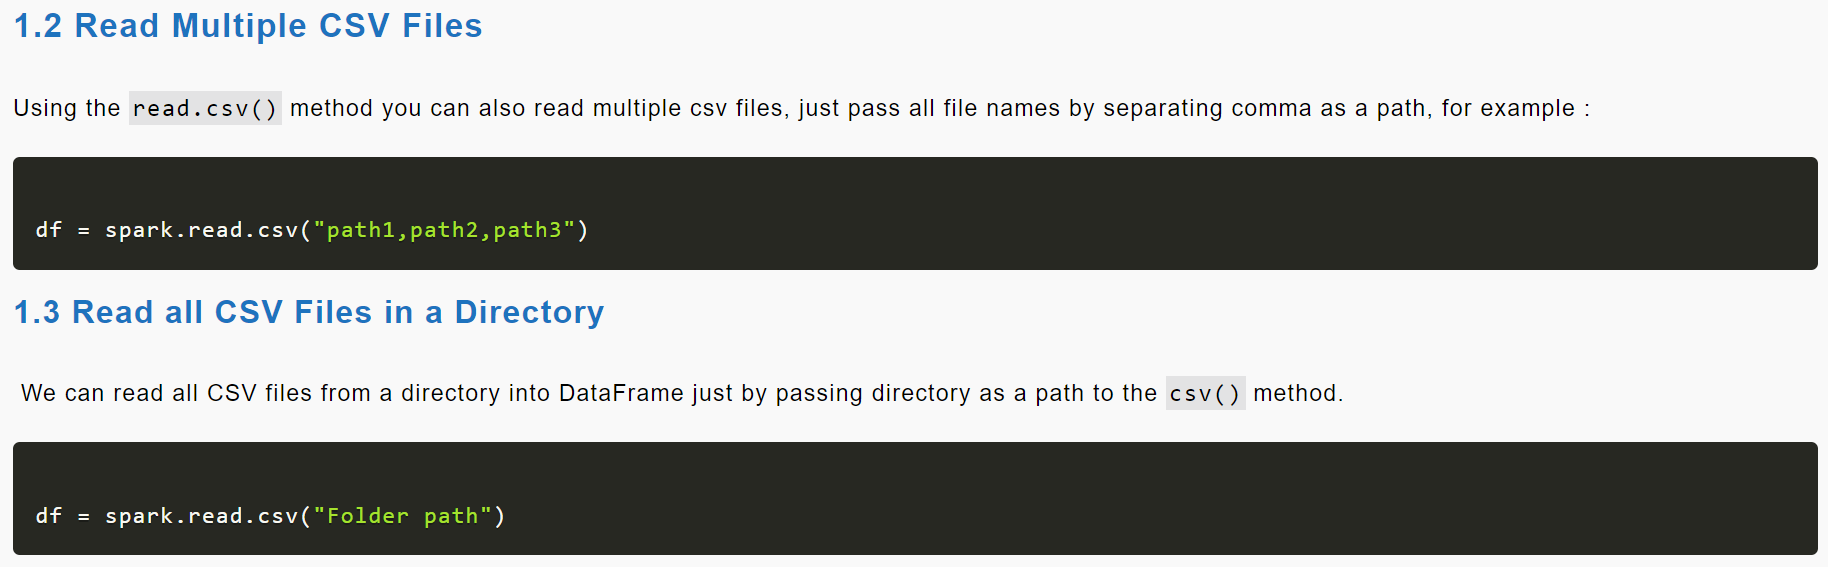

## Usando spark.read.csv()

* Read all files in a folder, please make sure only CSV files should present in the folder.

In [ ]:

folderPath = "../ProjetoSparkKB/Dados/Candidato/"
df5 = spark.read.csv(folderPath,sep=';')
df5.count()

## Usando spark.read.format()


In [ ]:

dfExemplo2 = spark.read.format("csv").load(arquivoDadosEleitorais)
    
dfExemplo2.printSchema()

# 03.5 - Importando Arquivo CSV Definindo inferSchema

## Entendendo o parâmetro inferSchema

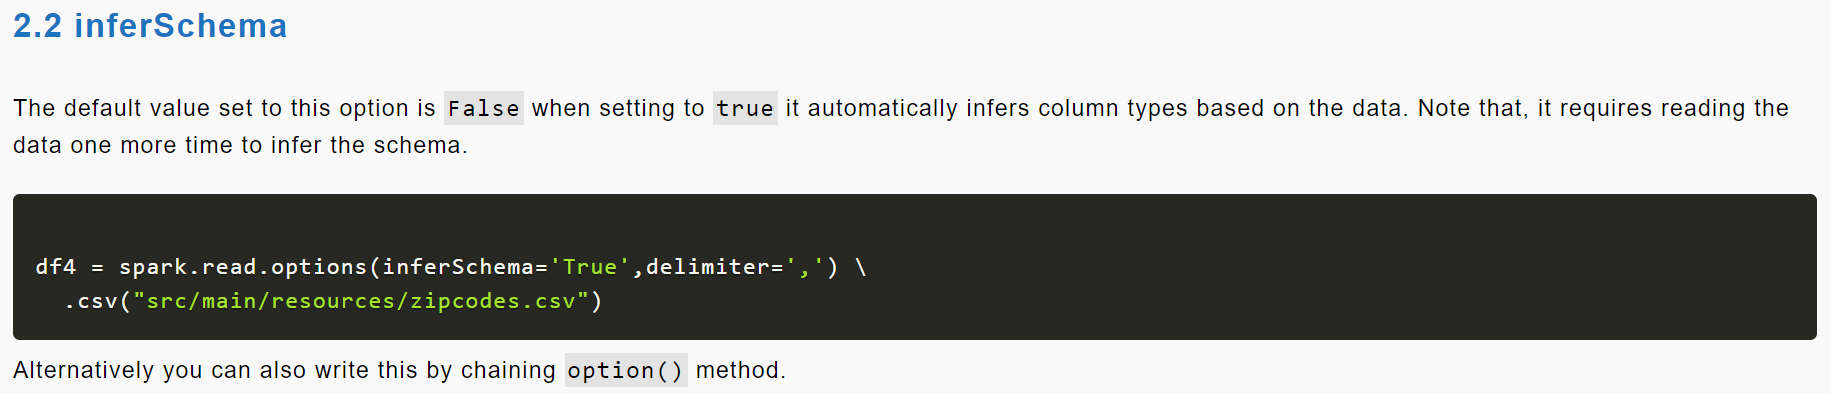

## Parâmetro inferSchema FALSE

In [ ]:

dfExemplo3 = spark.read.option("inferSchema",False) \
                .option("delimiter",";") \
                .option("header",True) \
                .csv(arquivoDadosEleitorais)

dfExemplo3.printSchema()

## Parâmetro inferSchema TRUE

In [ ]:

dfExemplo04 = spark.read.options(header='True'
                                 , inferSchema='True'
                                 , delimiter=';') \
                                 .csv(arquivoDadosEleitorais)

dfExemplo04.printSchema()

# 03.6 - Importando Arquivo CSV Definindo encoding

## Entendendo o parâmetro encoding

** Documentação: https://sqlrelease.com/spark-read-file-with-special-characters-using-pyspark

In [ ]:

dfExemplo04 = spark.read.options(header='True'
                                 , inferSchema='True'
                                 , delimiter=';'
                                 , encoding="windows-1252") \
                                 .csv(arquivoDadosEleitorais)

dfExemplo04.show()


# 03.7 - Definindo a Estrutura de um DataFrame e Importar CSV

** Documentação: https://sqlrelease.com/spark-read-file-with-special-characters-using-pyspark

** Documentação: https://sparkbyexamples.com/pyspark/pyspark-sql-types-datatype-with-examples/

** Documentação: https://spark.apache.org/docs/latest/sql-ref-datatypes.html

** Documentação: https://sparkbyexamples.com/pyspark/pyspark-date_format-convert-date-to-string-format/

### O arquivo "indicador_homocidio.csv" foi criado com a coluna Data do tipo "Data"
### O que permitiu a criação do DataFrame com a coluna Data do tipo DateType()

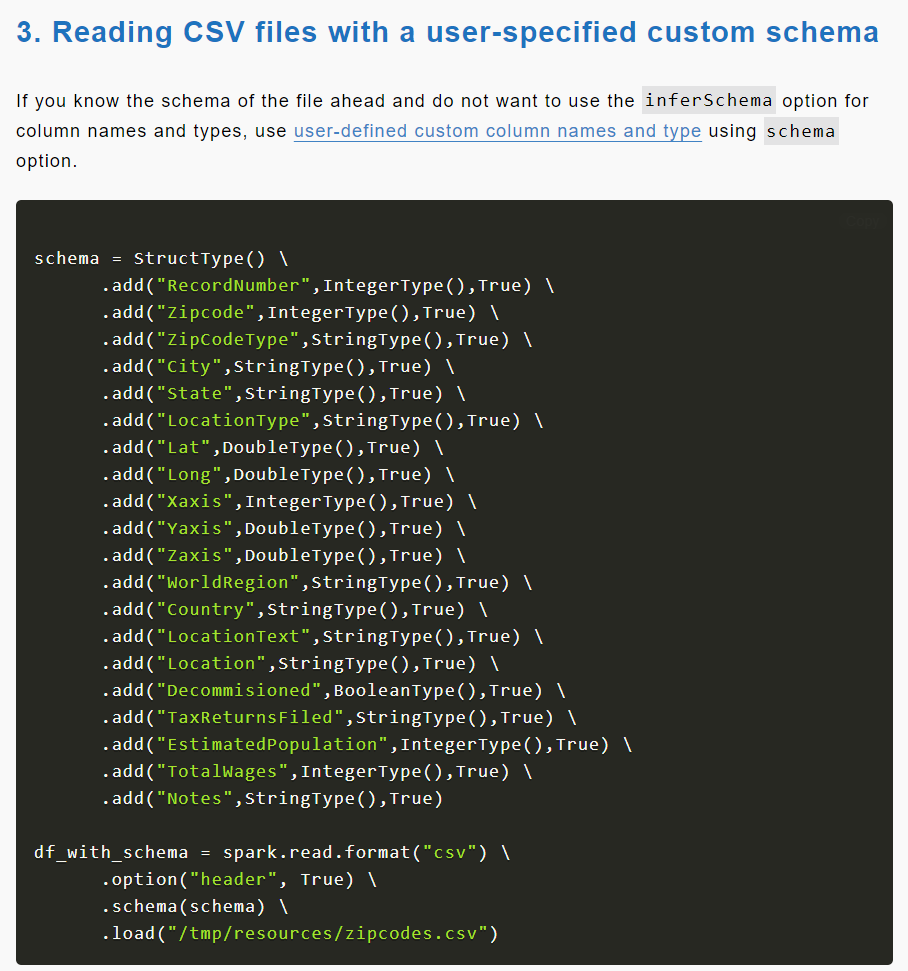

In [ ]:

schema = StructType() \
      .add("CodUf",StringType(),True) \
      .add("TipoCrime",StringType(),True) \
      .add("Quantidade",IntegerType(),True) \
      .add("Data",DateType(),True)


df_with_schema = spark.read.options(header='True'
                                    , inferSchema='False'
                                    , delimiter=';'
                                    , encoding="windows-1252") \
                                    .schema(schema) \
                                    .csv(arquivoIndicadorHomicidio)

df_with_schema.printSchema()

df_with_schema.show()

# 03.8 - .option("maxRowsInMemory",1000) (NOVO)

# 04 - Trabalhando com Datas - Converte coluna String (DD/MM/AAA) para Date (AAAAMMDD)

### O arquivo "indicador_homocidio_2.csv" foi criado com a coluna Data do tipo "Geral"
### Nesse caso, vamos precisar criar o DataFrame com a coluna Data do tipo StringType() e em seguida realizar a conversão da coluna para o tipo Date

* Trabalhando com Datas

** Documentação: https://spark.apache.org/docs/latest/sql-ref-datetime-pattern.html

** Documentação: https://www.datasciencemadesimple.com/get-month-year-and-quarter-from-date-in-pyspark/

** Documentação: https://www.projectpro.io/recipes/explain-conversion-of-timestamp-date-pyspark-databricks#:~:text=The%20to_date()%20function%20in,SSS%22.

** Documentação: https://www.projectpro.io/recipes/explain-conversion-of-timestamp-date-pyspark-databricks#:~:text=The%20to_date()%20function%20in,SSS%22.

** Documentação: https://sparkbyexamples.com/pyspark/pyspark-date_format-convert-date-to-string-format/

** Documentação: https://www.datasciencemadesimple.com/typecast-string-to-date-and-date-to-string-in-pyspark/

** Documentação: https://sparkbyexamples.com/pyspark/pyspark-sql-date-and-timestamp-functions/

In [ ]:
from pyspark.sql.functions import *
from pyspark.sql.types import StringType

schema = StructType() \
      .add("CodUf",StringType(),True) \
      .add("TipoCrime",StringType(),True) \
      .add("Quantidade",IntegerType(),True) \
      .add("Data",StringType(),True)

df_with_schema2 = spark.read.options(header='True', inferSchema='False', delimiter=';', encoding="windows-1252") \
      .schema(schema) \
      .csv(arquivoIndicadorHomicidio2)

df_with_schema2.show()

print('------------------------------ ESTRUTURA ANTES DA CONVERSÃO ------------------------------')

df_with_schema2.printSchema()

print('------------------------------------------------------------------------------------------')

df_with_schema2 = df_with_schema2.withColumn('Data', to_date(date_format(unix_timestamp(df_with_schema2.Data , "dd/mm/yyyy").cast("timestamp"),"yyyy-mm-dd")))

print('------------------------------ ESTRUTURA DEPOIS DA CONVERSÃO ------------------------------')

df_with_schema2.printSchema()

df_with_schema2.show()

# 04.1 - Trabalhando com Datas - A partir de uma coluna de Data, criar outra de Ano

In [ ]:

df_with_schema2 = df_with_schema2.withColumn("Ano", date_format(col("Data"), "y"))


df_with_schema2.printSchema()

# 04.2 - Trabalhando com Datas - A partir de uma coluna de Data, criar outra de Mês

In [ ]:

df_with_schema2 = df_with_schema2.withColumn("NumMes", date_format(col("Data"), "M"))

df_with_schema2 = df_with_schema2.withColumn("NomMes", date_format(col("Data"), "L"))


df_with_schema2.printSchema()

df_with_schema2.show()

# 04.3 - Trabalhando com Datas - A partir de uma coluna de Data, criar outra de Dia

In [ ]:

df_with_schema2 = df_with_schema2.withColumn("NumDiaAno", date_format(col("Data"), "D"))

df_with_schema2 = df_with_schema2.withColumn("NumDiaMes", date_format(col("Data"), "d"))

df_with_schema2.printSchema()

df_with_schema2.show()

# 05 - Manipulando informações de um DataFrame

## 05.1 - Tratando Valores Nulos

In [ ]:

schema = StructType() \
      .add("CodUf",StringType(),True) \
      .add("TipoCrime",StringType(),True) \
      .add("Quantidade",IntegerType(),True) \
      .add("Data",StringType(),True) \


df_with_schema = spark.read.options(header='True'
                                    , inferSchema='False'
                                    , delimiter=';'
                                    , encoding="windows-1252") \
                                    .schema(schema) \
                                    .csv(arquivoIndicadorHomicidioRes)

#df_with_schema = df_with_schema.fillna(0) # ==> NÃO FUNCIONA PARA A COLUNA DATA 

#df_with_schema = df_with_schema.fillna('0') # ==> NÃO FUNCIONA PARA A COLUNA QUANTIDADE 

#df_with_schema = df_with_schema.na.fill(0) # ==> NÃO FUNCIONA PARA A COLUNA DATA

#df_with_schema = df_with_schema.na.fill('0') # ==> NÃO FUNCIONA PARA A COLUNA QUANTIDADE 

#df_with_schema = df_with_schema.na.fill('0', ["Data"]) # ==> FUNCIONA

# df_with_schema = df_with_schema.na.fill(0, ["Data"]) # ==> NÃO FUNCIONA DEVIDO AO TIPO DE DADO

df_with_schema.printSchema()

df_with_schema.show()

## 05.2 - Filtrando Valores 

### 05.2.1 - Semelhante a cláusula LIKE - "CONTÉM" de Bancos de Dados

In [ ]:

schema = StructType() \
      .add("CodUf",StringType(),True) \
      .add("TipoCrime",StringType(),True) \
      .add("Quantidade",IntegerType(),True) \
      .add("Data",StringType(),True)


df_with_schema = spark.read.options(header='True'
                                    , inferSchema='False'
                                    , delimiter=';'
                                    , encoding="windows-1252") \
                                    .schema(schema) \
                                    .csv(arquivoIndicadorHomicidioRes)

#df_with_schema = df_with_schema.filter(df_with_schema['CodUf'].contains('P'))


## CONTÉM
df_with_schema.filter(df_with_schema.CodUf.like("%Ri%")).show()

## INICIA COM 
df_with_schema.filter(df_with_schema.CodUf.like("Ri%")).show()

## TERMINA COM
df_with_schema.filter(df_with_schema.CodUf.like("%lo")).show()

df_with_schema.printSchema()

df_with_schema.show()





In [ ]:

schema = StructType() \
      .add("CodUf",StringType(),True) \
      .add("TipoCrime",StringType(),True) \
      .add("Quantidade",IntegerType(),True) \
      .add("Data",StringType(),True)


df_with_schema = spark.read.options(header='True'
                                    , inferSchema='False'
                                    , delimiter=';'
                                    , encoding="windows-1252") \
                                    .schema(schema) \
                                    .csv(arquivoIndicadorHomicidioRes)

df_with_schema = df_with_schema.filter(df_with_schema['CodUf'].contains('P'))

df_with_schema.printSchema()

df_with_schema.show()

### 05.2.2 - Semelhante a cláusula LIKE - "INICIA COM" de Bancos de Dados

In [ ]:

schema = StructType() \
      .add("CodUf",StringType(),True) \
      .add("TipoCrime",StringType(),True) \
      .add("Quantidade",IntegerType(),True) \
      .add("Data",StringType(),True)


df_with_schema = spark.read.options(header='True'
                                    , inferSchema='False'
                                    , delimiter=';'
                                    , encoding="windows-1252") \
                                    .schema(schema) \
                                    .csv(arquivoIndicadorHomicidioRes)

df_with_schema = df_with_schema.filter(df_with_schema['CodUf'].startswith('R'))

df_with_schema.printSchema()

df_with_schema.show()

### 05.2.3 - Semelhante a cláusula LIKE - "TERMINA COM" de Bancos de Dados

In [ ]:

schema = StructType() \
      .add("CodUf",StringType(),True) \
      .add("TipoCrime",StringType(),True) \
      .add("Quantidade",IntegerType(),True) \
      .add("Data",StringType(),True)


df_with_schema = spark.read.options(header='True'
                                    , inferSchema='False'
                                    , delimiter=';'
                                    , encoding="windows-1252") \
                                    .schema(schema) \
                                    .csv(arquivoIndicadorHomicidioRes)

df_with_schema = df_with_schema.filter(df_with_schema['CodUf'].endswith('o'))

df_with_schema.printSchema()

df_with_schema.show()

### 05.2.4 - Semelhante a cláusula WHERE de Bancos de Dados

#### WHERE com uma Condição

In [ ]:

schema = StructType() \
      .add("CodUf",StringType(),True) \
      .add("TipoCrime",StringType(),True) \
      .add("Quantidade",IntegerType(),True) \
      .add("Data",StringType(),True)


df_with_schema = spark.read.options(header='True'
                                    , inferSchema='False'
                                    , delimiter=';'
                                    , encoding="windows-1252") \
                                    .schema(schema) \
                                    .csv(arquivoIndicadorHomicidioRes)

df_with_schema = df_with_schema.where(df_with_schema['CodUf']=='Rio de Janeiro')

df_with_schema.printSchema()

df_with_schema.show()

In [ ]:

schema = StructType() \
      .add("CodUf",StringType(),True) \
      .add("TipoCrime",StringType(),True) \
      .add("Quantidade",IntegerType(),True) \
      .add("Data",StringType(),True)

df_with_schema = spark.read.options(header='True'
                                    , inferSchema='False'
                                    , delimiter=';'
                                    , encoding="windows-1252") \
                                    .schema(schema) \
                                    .csv(arquivoIndicadorHomicidioRes)

df_with_schema1 = df_with_schema.where(df_with_schema['Quantidade'] > 10000)

df_with_schema2 = df_with_schema.where(df_with_schema['Quantidade'] >= 10000)

df_with_schema3 = df_with_schema.where(df_with_schema['Quantidade'] != 10000)

df_with_schema4 = df_with_schema.where(df_with_schema['Quantidade'] < 10000)

df_with_schema5 = df_with_schema.where(df_with_schema['Quantidade'] <= 10000)

#df_with_schema.printSchema()

print('--------------------------- MAIOR QUE 10000 ---------------------------')

df_with_schema1.show()

print('--------------------------- MAIOR IGUAL QUE 10000 ---------------------------')

df_with_schema2.show()

print('--------------------------- DIFERENTE DE 10000 ---------------------------')

df_with_schema3.show()

print('--------------------------- MENOR QUE 10000 ---------------------------')

df_with_schema4.show()

print('--------------------------- MENOR IGUAL QUE 10000 ---------------------------')

df_with_schema5.show()

#### WHERE com MULTIPLAS Condições

In [ ]:

schema = StructType() \
      .add("CodUf",StringType(),True) \
      .add("TipoCrime",StringType(),True) \
      .add("Quantidade",IntegerType(),True) \
      .add("Data",StringType(),True) \


df_with_schema = spark.read.options(header='True'
                                    , inferSchema='False'
                                    , delimiter=';'
                                    , encoding="windows-1252") \
                                    .schema(schema) \
                                    .csv(arquivoIndicadorHomicidioRes)

df_with_schema = df_with_schema.filter(df_with_schema['CodUf'].isin('Rio de Janeiro','São Paulo')) 

df_with_schema.printSchema()

df_with_schema.show()

#### Quando ocorrer a necessidade de filtrar vários valores na mesma coluna, devemos usaro a cláusula ISIN quando for em campos diferentes devemos usar a cláusula WHERE com MULTIPLAS Condições

#### ISNOTIN

In [ ]:

schema = StructType() \
      .add("CodUf",StringType(),True) \
      .add("TipoCrime",StringType(),True) \
      .add("Quantidade",IntegerType(),True) \
      .add("Data",StringType(),True) \


df_with_schema = spark.read.options(header='True'
                                    , inferSchema='False'
                                    , delimiter=';'
                                    , encoding="windows-1252") \
                                    .schema(schema) \
                                    .csv(arquivoIndicadorHomicidioRes)

#df_with_schema = df_with_schema.where(~df_with_schema['CodUf'].isin('Rio de Janeiro','São Paulo'))

df_with_schema = df_with_schema.where(df_with_schema['CodUf'].isin('Rio de Janeiro','São Paulo')==False)

df_with_schema.printSchema()

df_with_schema.show()



### 05.2.5 - Semelhante a cláusula IN de Bancos de Dados

In [ ]:

schema = StructType() \
      .add("CodUf",StringType(),True) \
      .add("TipoCrime",StringType(),True) \
      .add("Quantidade",IntegerType(),True) \
      .add("Data",StringType(),True) \


df_with_schema = spark.read.options(header='True'
                                    , inferSchema='False'
                                    , delimiter=';'
                                    , encoding="windows-1252") \
                                    .schema(schema) \
                                    .csv(arquivoIndicadorHomicidioRes)

df_with_schema = df_with_schema.where(df_with_schema['CodUf'].isin('Rio de Janeiro'))

df_with_schema.printSchema()

df_with_schema.show()

In [ ]:

schema = StructType() \
      .add("CodUf",StringType(),True) \
      .add("TipoCrime",StringType(),True) \
      .add("Quantidade",IntegerType(),True) \
      .add("Data",StringType(),True) \


df_with_schema = spark.read.options(header='True'
                                    , inferSchema='False'
                                    , delimiter=';'
                                    , encoding="windows-1252") \
                                    .schema(schema) \
                                    .csv(arquivoIndicadorHomicidioRes)

df_with_schema = df_with_schema.where(df_with_schema['CodUf'].isin('Rio de Janeiro','São Paulo'))

df_with_schema = df_with_schema.where(df_with_schema['CodUf'].isin(['Rio de Janeiro','São Paulo']))

df_with_schema.printSchema()

df_with_schema.show()

## 05.3 - Tratando Valores com UPPER, LOWER e INITCAPT

In [ ]:

schema = StructType() \
      .add("CodUf",StringType(),True) \
      .add("TipoCrime",StringType(),True) \
      .add("Quantidade",IntegerType(),True) \
      .add("Data",StringType(),True) \


df_with_schema = spark.read.options(header='True'
                                    , inferSchema='False'
                                    , delimiter=';'
                                    , encoding="windows-1252") \
                                    .schema(schema) \
                                    .csv(arquivoIndicadorHomicidioRes)

df_with_schema = df_with_schema.withColumn("CodUf_upper", upper(col("CodUf")))

df_with_schema = df_with_schema.withColumn("CodUf_lower", lower(col("CodUf")))

df_with_schema = df_with_schema.withColumn("CodUf_incap", initcap(col("CodUf")))

df_with_schema.printSchema()

df_with_schema.show()


# 06 - Transformando o DataFrame Spark em Tabela Temporária

In [ ]:
df.createOrReplaceTempView('teste')

## 06.1 - Lendo a Tabela e Transformando em outro DataFrame Spark

In [ ]:
df2 = spark.sql("""
SELECT DT_GERACAO 
FROM TESTE
""")

# 07 - Convertendo DataType de um DataFrame Spark

## 07.1 -  De uma Coluna 

In [ ]:
df2.withColumn("DT_GERACAO", df2["DT_GERACAO"].cast("timestamp")).printSchema()

## 07.2 - Criando uma nova Coluna

In [ ]:
df2.withColumn("DTGERACAO", df2["DT_GERACAO"].cast("timestamp")).printSchema()

# 08 - Renomeando Coluna(s) em DataFrame Spark

## 08.1 - Uma Única Coluna

In [ ]:
df2.withColumnRenamed("DT_GERACAO","DT_GERACAO2").printSchema()

## 08.2 - Várias Colunas

In [ ]:
df3 = spark.sql("""
SELECT DT_GERACAO , HH_GERACAO
FROM TESTE
""")

df3 = df3.withColumnRenamed("DT_GERACAO","DtGeracao") \
            .withColumnRenamed("HH_GERACAO","HrGeracao")
df3.printSchema()


# 09 - Ordenando um DataFrame Spark

## 09.1 - Ordenando um DataFrame Spark por uma Coluna

In [ ]:
df4 = spark.sql("""
SELECT SG_UF , NM_URNA_CANDIDATO
FROM TESTE
""")

df4.show()

df4.sort("SG_UF").show(truncate=False)


## 09.2 - Ordenando um DataFrame Spark por Várias Colunas

In [ ]:
df4.sort("SG_UF","NM_URNA_CANDIDATO").show(truncate=False)


In [ ]:

df4.sort(col("SG_UF"),col("NM_URNA_CANDIDATO")).show(truncate=False)

# 10 - Agrupando um DataFrame Spark

In [ ]:
df4.groupBy("SG_UF").count().show(truncate=False)

# 11 - Funções de Agrupamento (Count(), Sum(), Min(), Max() e Mean())

In [ ]:
df5 = spark.sql("""
SELECT SG_UF , NM_URNA_CANDIDATO, SQ_CANDIDATO
FROM TESTE
""")

df5.groupBy("SG_UF") \
    .agg(count("SQ_CANDIDATO").alias("count_SQ_CANDIDATO"), \
         sum("SQ_CANDIDATO").alias("sum_SQ_CANDIDATO"), \
         avg("SQ_CANDIDATO").alias("avg_SQ_CANDIDATO"), \
         min("SQ_CANDIDATO").alias("min_SQ_CANDIDATO"), \
         max("SQ_CANDIDATO").alias("max_SQ_CANDIDATO") \
     ) \
    .show(truncate=False)

# 12 - Lendo/Gerando Arquivos a Parquet

## 12.1 - Gerando Arquivos a Parquet

* Para trabalhar com parquet usando Python, existe a necessidade de realizar a instalação das duas bibliotecas abaixo:


* * pip install fastparquet
* * pip install pyarrow

# 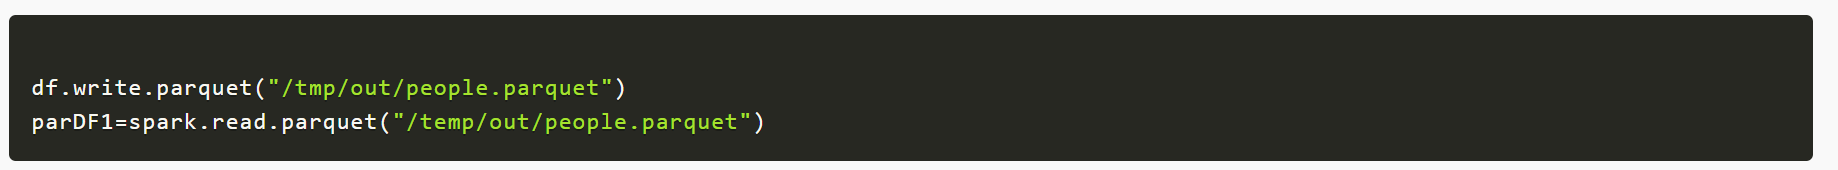

In [ ]:
dfz = df.toPandas()

dfz.to_parquet('../ProjetoSparkKB/Dados/CANDIDATOS.parquet'
               , engine='pyarrow'
               , index=False)


* Geração de arquivos parquet a partir de um DataFrame Pandas particionando (separando em vários arquivos) a partir dos valores de uma terminada coluna

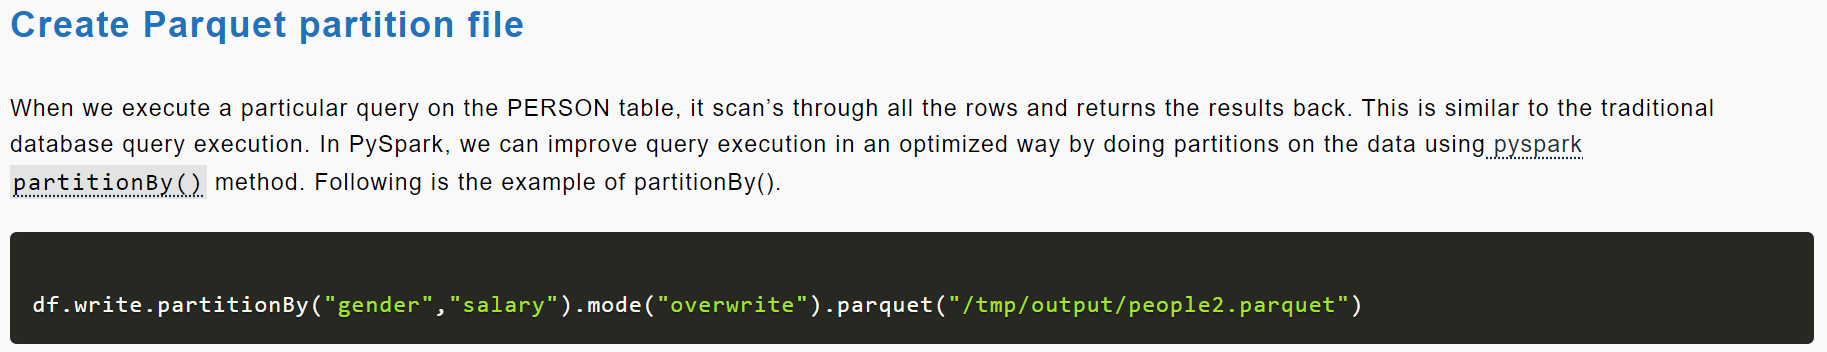

* * df.write.partitionBy("gender","salary").mode("overwrite").parquet("/tmp/output/people2.parquet")

In [ ]:
dfz = df.toPandas()

dfz.to_parquet('../ProjetoSparkKB/Dados'
               , engine='pyarrow'
               , index=False
               , partition_cols='SG_UF')


* Geração de um arquivo parquet zipado a partir de um DataFrame Pandas

In [ ]:
dfz = df.toPandas()

dfz.to_parquet('../ProjetoSparkKB/Dados/CANDIDATOS_PARQUET.parquet.gzip'
               , engine='pyarrow'
               , index=False
               , compression='gzip')


* Geração de arquivos parquet a partir de um DataFrame Pandas particionando (separando em vários arquivos) a partir dos valores de uma terminada coluna

* Nessa geração é criada um diretório para cada valor distintio da coluna 'SG_UF'

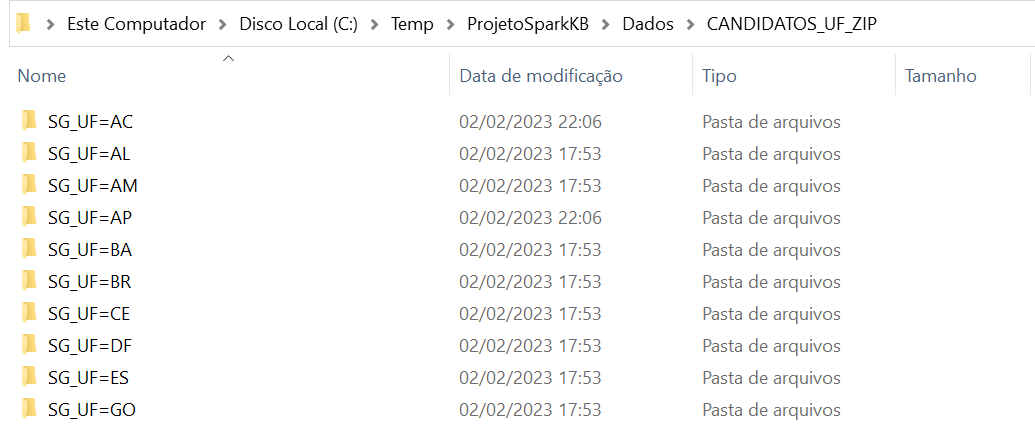

In [ ]:

dfz = df.toPandas()

dfz.to_parquet('../ProjetoSparkKB/Dados/CANDIDATOS_ZIP_UF'
               , engine='pyarrow'
               , index=False
               , compression='gzip'
               , partition_cols='SG_UF')


## 12.2 - Lendo Arquivos a Parquet

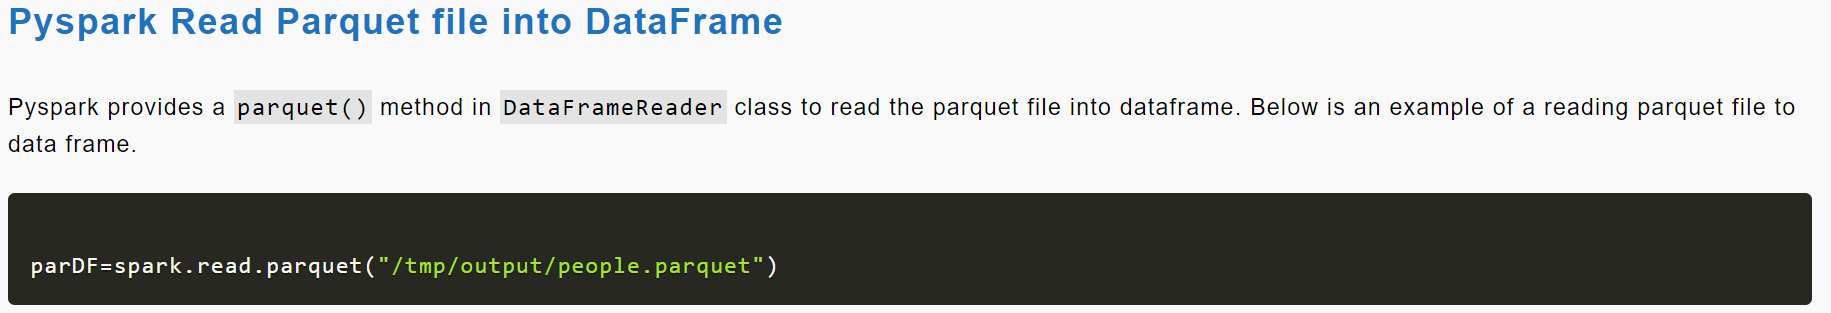

In [ ]:
parDF=spark.read.parquet("../ProjetoSparkKB/Dados/CANDIDATOS.parquet")

#parDF1.head(4)

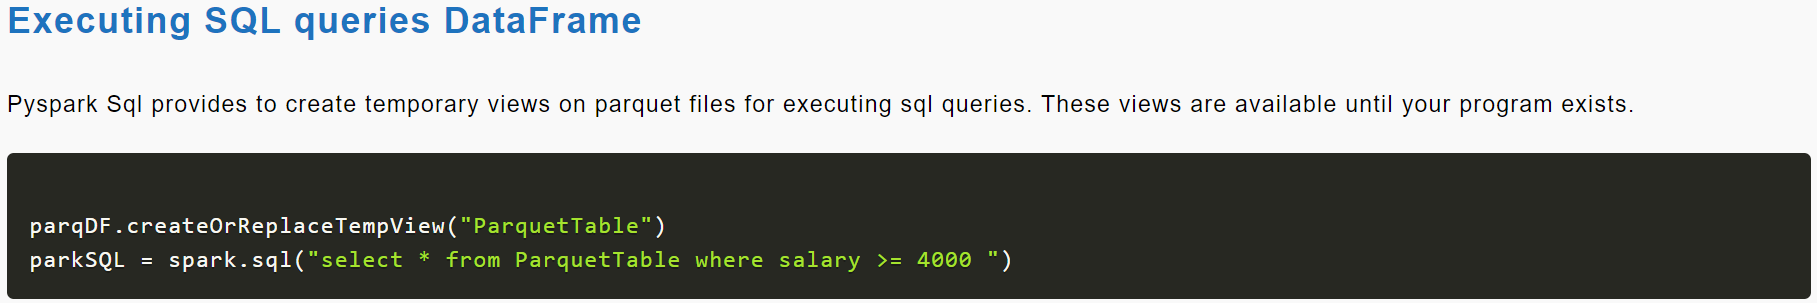

In [ ]:
parDF.createOrReplaceTempView('ParquetCANDIDATOS')

parquetSQL = spark.sql("SELECT * FROM ParquetCANDIDATOS LIMIT 1")

parquetSQL

# 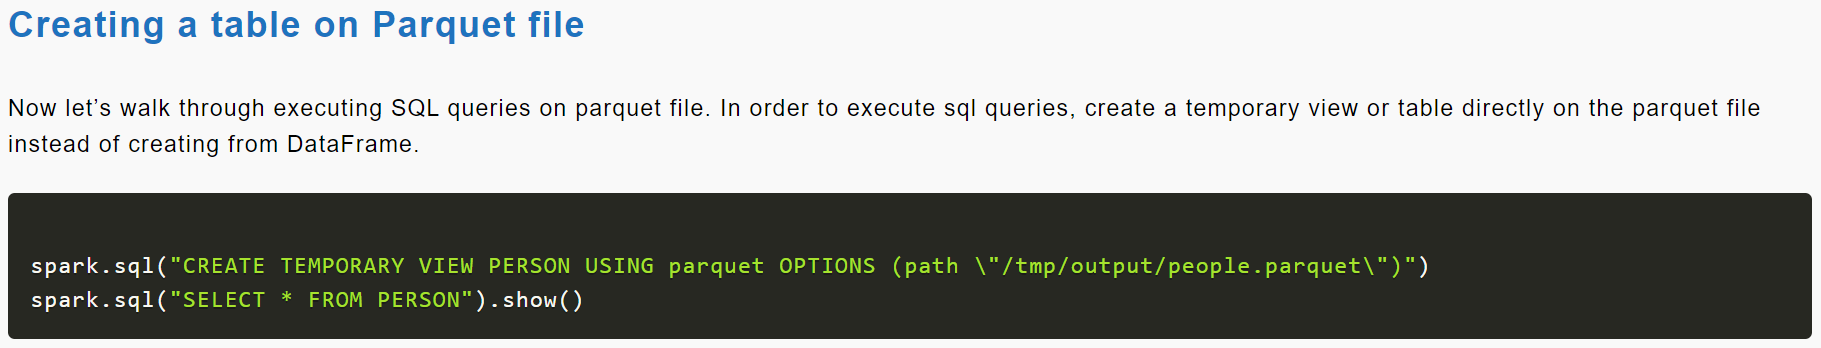

In [ ]:

spark.sql("DROP VIEW IF EXISTS CANDIDATOS_AC")

spark.sql("""CREATE TEMPORARY VIEW CANDIDATOS_AC 
                USING parquet 
                OPTIONS (path \"../ProjetoSparkKB/Dados/CANDIDATOS_UF_ZIP/SG_UF=AC\")""")

dfAC = spark.sql("SELECT SG_UE , COUNT(1) TOTAL FROM CANDIDATOS_AC GROUP BY SG_UE")

dfAC

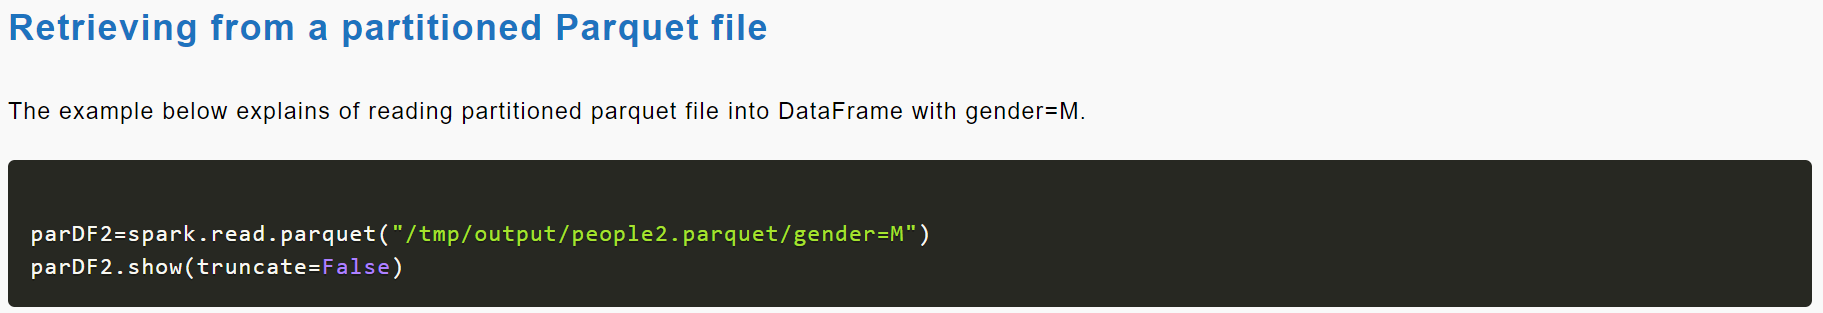

In [ ]:
parDF2=spark.read.parquet("../ProjetoSparkKB/Dados/CANDIDATOS_UF_ZIP/SG_UF=AC")

parDF2.createOrReplaceTempView('ParquetCANDIDATOS_AC')

dfAC = spark.sql("SELECT SG_UE , COUNT(1) TOTAL FROM ParquetCANDIDATOS_AC GROUP BY SG_UE")

dfAC

In [ ]:

spark.sql("DROP VIEW IF EXISTS CANDIDATOS")

spark.sql("""CREATE TEMPORARY VIEW CANDIDATOS 
                USING parquet 
                OPTIONS (path \"../ProjetoSparkKB/Dados/CANDIDATOS.parquet\")""")

dfSQL = spark.sql("SELECT * FROM CANDIDATOS LIMIT 1")

dfSQL

In [ ]:
spark.sql("desc CANDIDATOS").show()

# 13 - Gerando Arquivos a CSV

In [ ]:
dfz = df.toPandas()

dfz.info()

dfz.to_csv('../ProjetoSparkKB/Dados/teste.csv')

# Pesquisas Futuras

https://sparkbyexamples.com/spark/spark-convert-csv-to-avro-parquet-json/

video para correção do erro ao salvar Parquet

https://www.youtube.com/watch?v=s2yjvQPGsyw

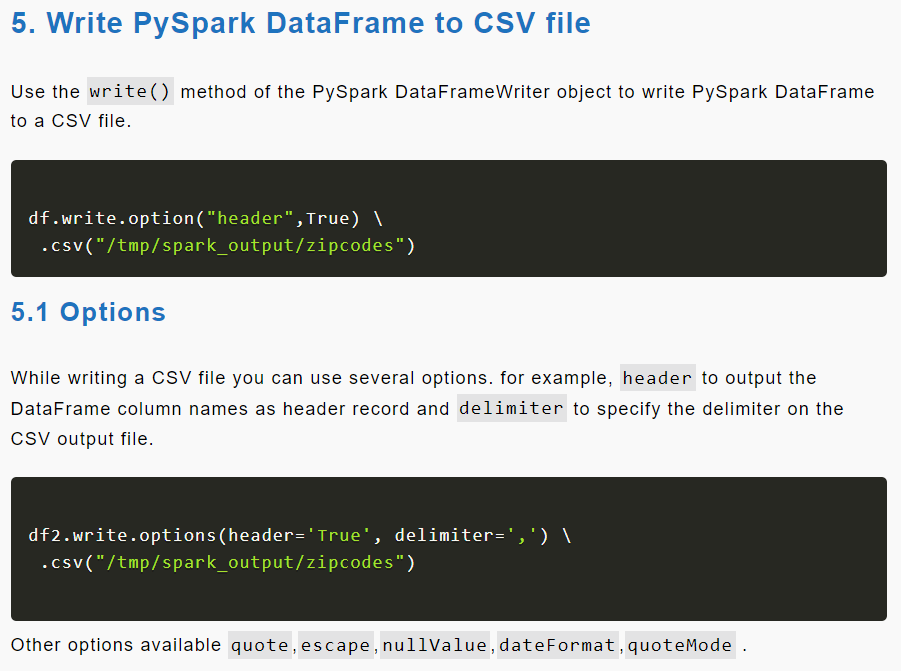

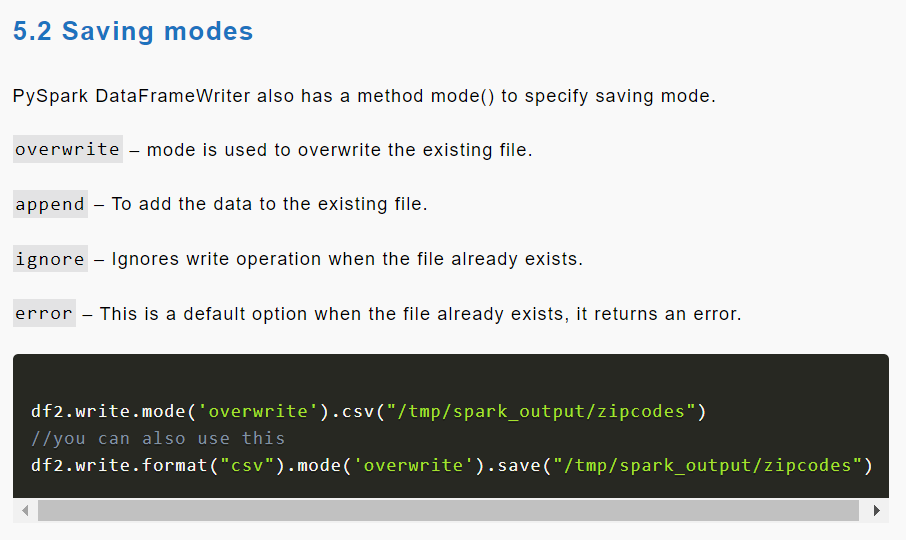

# Sessão Destinada a Fontes de Pesquisa

* https://sparkbyexamples.com/pyspark/pyspark-read-csv-file-into-dataframe/